In [13]:
import pandas as pd
import numpy as np

In [136]:
train_data = pd.read_csv('./loan_train.csv')

In [15]:
train_data

Gender Married Dependents     Education Self_Employed  Applicant_Income  \
0      Male      No          0      Graduate            No            584900   
1      Male     Yes          1      Graduate            No            458300   
2      Male     Yes          0      Graduate           Yes            300000   
3      Male     Yes          0  Not Graduate            No            258300   
4      Male      No          0      Graduate            No            600000   
..      ...     ...        ...           ...           ...               ...   
609  Female      No          0      Graduate            No            290000   
610    Male     Yes         3+      Graduate            No            410600   
611    Male     Yes          1      Graduate            No            807200   
612    Male     Yes          2      Graduate            No            758300   
613  Female      No          0      Graduate           Yes            458300   

     Coapplicant_Income  Loan_Amount   Term  Credit_History       Area Status  
0                   0.0     15000000  360.0             1.0      Urban      Y  
1              150800.0     12800000  360.0             1.0      Rural      N  
2                   0.0      6600000  360.0             1.0      Urban      Y  
3              235800.0     12000000  360.0             1.0      Urban      Y  
4                   0.0     14100000  360.0             1.0      Urban      Y  
..                  ...          ...    ...             ...        ...    ...  
609                 0.0      7100000  360.0             1.0      Rural      Y  
610                 0.0      4000000  180.0             1.0      Rural      Y  
611             24000.0     25300000  360.0             1.0      Urban      Y  
612                 0.0     18700000  360.0             1.0      Urban      Y  
613                 0.0     13300000  360.0             0.0  Semiurban      N  

[614 rows x 12 columns]

In [16]:
train_data.describe()

Applicant_Income  Coapplicant_Income   Loan_Amount       Term  \
count      6.140000e+02        6.140000e+02  6.140000e+02  600.00000   
mean       5.403459e+05        1.621246e+05  1.414104e+07  342.00000   
std        6.109042e+05        2.926248e+05  8.815682e+06   65.12041   
min        1.500000e+04        0.000000e+00  0.000000e+00   12.00000   
25%        2.877500e+05        0.000000e+00  9.800000e+06  360.00000   
50%        3.812500e+05        1.188500e+05  1.250000e+07  360.00000   
75%        5.795000e+05        2.297250e+05  1.647500e+07  360.00000   
max        8.100000e+06        4.166700e+06  7.000000e+07  480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [17]:
train_data.isna().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

Plot Data before preprocessing

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Gender', ylabel='count'>

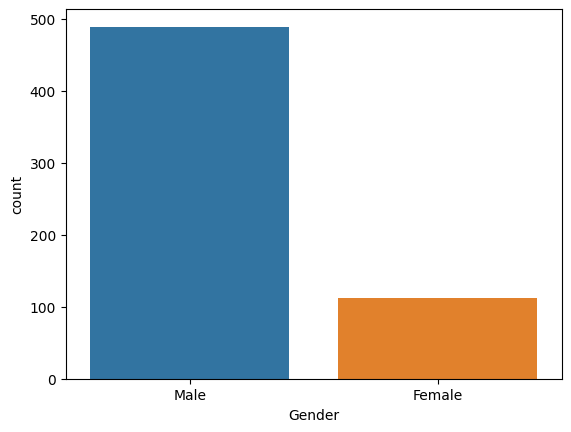

In [19]:
# Plot Gender
sns.countplot(x=train_data["Gender"])

<Axes: xlabel='Married', ylabel='count'>

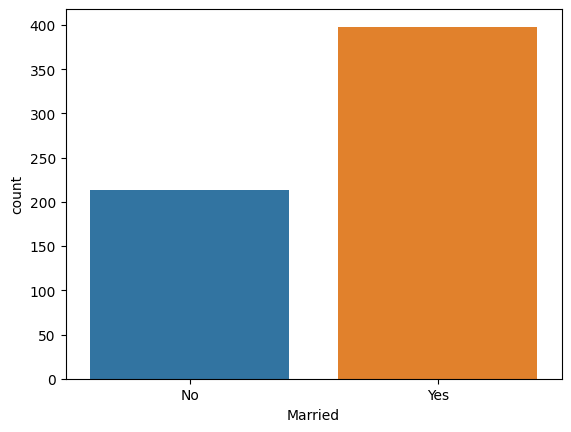

In [20]:
# Plot Married
sns.countplot(x=train_data["Married"])

<Axes: xlabel='Dependents', ylabel='count'>

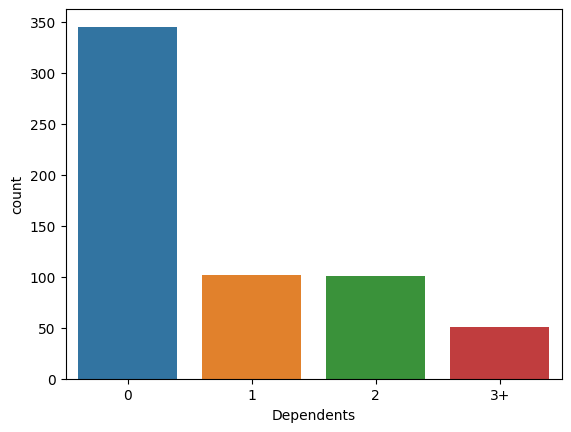

In [35]:
# Plot Dependents
sns.countplot(x=train_data["Dependents"])

<Axes: xlabel='Education', ylabel='count'>

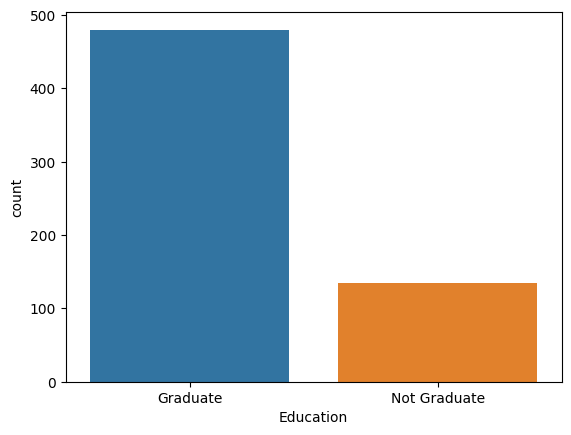

In [36]:
# Plot Gender
sns.countplot(x=train_data["Education"])

<Axes: xlabel='Self_Employed', ylabel='count'>

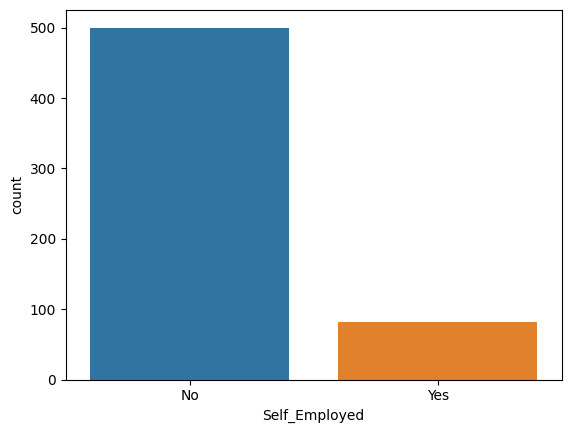

In [37]:
# Plot Self Employed
sns.countplot(x=train_data["Self_Employed"])

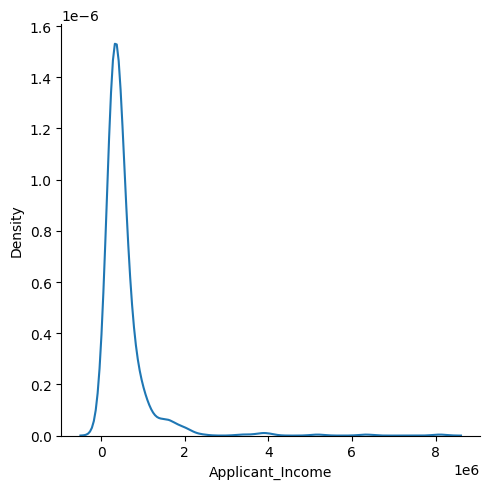

In [24]:
# Plot Applicant Income
sns.displot(train_data, x="Applicant_Income", kind="kde")

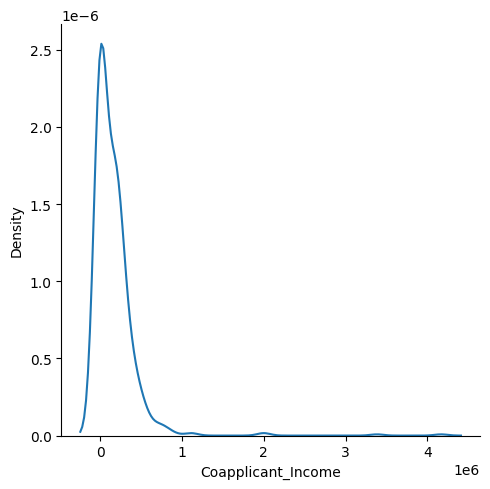

In [25]:
# Plot Copplicant Income
sns.displot(train_data, x="Coapplicant_Income", kind="kde")

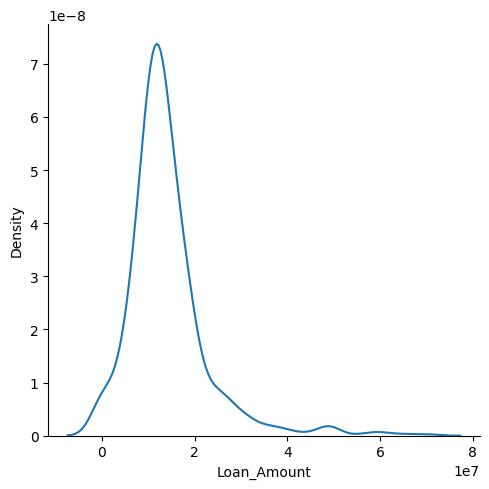

In [26]:
# Plot Loan Amount
sns.displot(train_data, x="Loan_Amount", kind="kde")

<Axes: xlabel='Term', ylabel='count'>

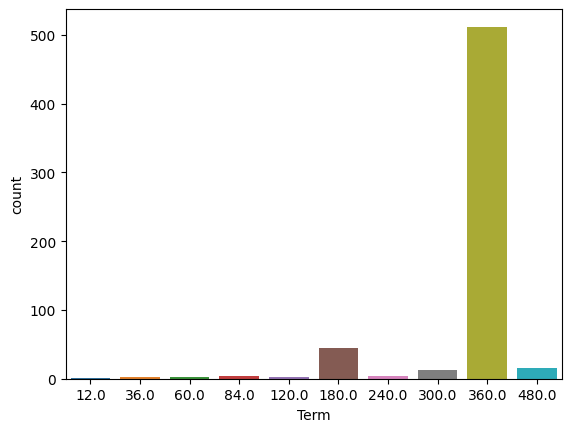

In [27]:
# Plot Term
# train_data.nunique()
# train_data["Term"].unique()
sns.countplot(x=train_data["Term"])

<Axes: xlabel='Credit_History', ylabel='count'>

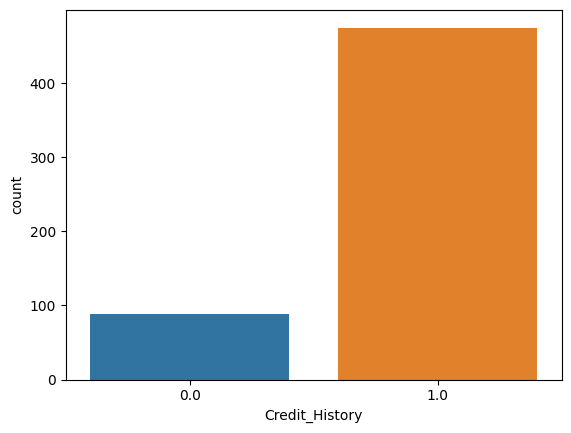

In [28]:
# Plot Credit History
sns.countplot(x=train_data["Credit_History"])

<Axes: xlabel='Area', ylabel='count'>

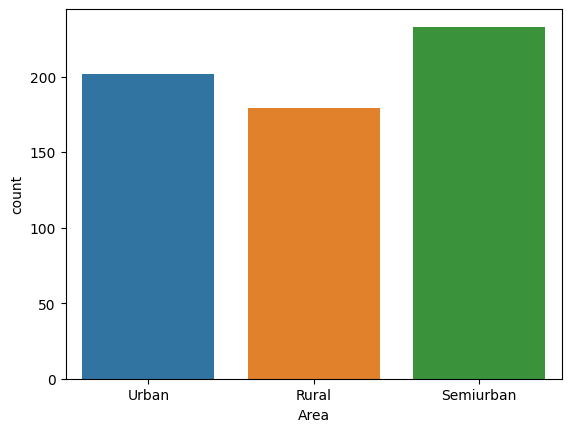

In [29]:
# Plot Area
sns.countplot(x=train_data["Area"])

<Axes: xlabel='Status', ylabel='count'>

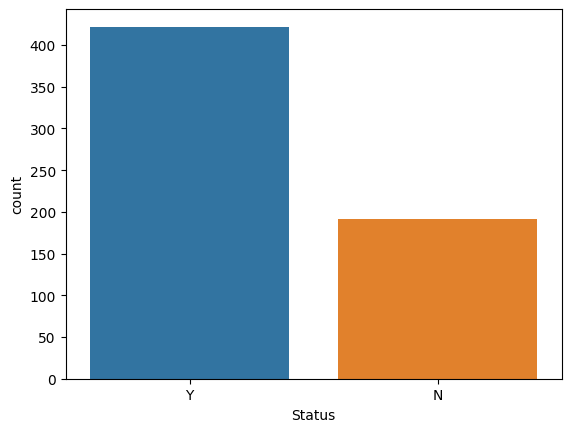

In [30]:
# Plot Output Label
sns.countplot(x=train_data["Status"])

From the plot of output label, it is obvious that training data is imbalanced.

In [39]:
train_data.describe()

Applicant_Income  Coapplicant_Income   Loan_Amount       Term  \
count      6.140000e+02        6.140000e+02  6.140000e+02  600.00000   
mean       5.403459e+05        1.621246e+05  1.414104e+07  342.00000   
std        6.109042e+05        2.926248e+05  8.815682e+06   65.12041   
min        1.500000e+04        0.000000e+00  0.000000e+00   12.00000   
25%        2.877500e+05        0.000000e+00  9.800000e+06  360.00000   
50%        3.812500e+05        1.188500e+05  1.250000e+07  360.00000   
75%        5.795000e+05        2.297250e+05  1.647500e+07  360.00000   
max        8.100000e+06        4.166700e+06  7.000000e+07  480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [31]:
# DATA PREPROCESSING

In [32]:
train_data.isna().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

In [33]:
train_data["Credit_History"].unique()

array([ 1.,  0., nan])

In [40]:
# Remove NaN values from Credit_History

In [41]:
mode_credit_hist = train_data["Credit_History"].mode()[0]
train_data["Credit_History"].fillna(mode_credit_hist, inplace=True)

In [42]:
train_data.isna().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History         0
Area                   0
Status                 0
dtype: int64

In [43]:
# Plot Credit_History again
# sns.countplot(x=train_data["Credit_History"])

In [44]:
# Remove NaN values from Term

In [45]:
mode_term = train_data["Term"].mode()[0]
train_data["Term"].fillna(mode_term, inplace=True)

In [46]:
train_data.isna().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                   0
Credit_History         0
Area                   0
Status                 0
dtype: int64

In [47]:
# sns.countplot(x=train_data["Term"])

In [48]:
# Replace zero with mean in Loan_Amount

In [49]:
mean_loan_amount = train_data["Loan_Amount"].mean()
train_data["Loan_Amount"] = train_data["Loan_Amount"].replace([0.0], [mean_loan_amount])

In [50]:
# Plot Loan_Amount again
# sns.displot(train_data, x="Loan_Amount", kind="kde")
train_data.isna().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                   0
Credit_History         0
Area                   0
Status                 0
dtype: int64

In [51]:
# replace zero with mean in coapplicant income

In [52]:
mean_coapp_income = train_data["Coapplicant_Income"].mean()
train_data["Coapplicant_Income"] = train_data["Coapplicant_Income"].replace([0.0], [mean_loan_amount])

In [53]:
train_data

Gender Married Dependents     Education Self_Employed  Applicant_Income  \
0      Male      No          0      Graduate            No            584900   
1      Male     Yes          1      Graduate            No            458300   
2      Male     Yes          0      Graduate           Yes            300000   
3      Male     Yes          0  Not Graduate            No            258300   
4      Male      No          0      Graduate            No            600000   
..      ...     ...        ...           ...           ...               ...   
609  Female      No          0      Graduate            No            290000   
610    Male     Yes         3+      Graduate            No            410600   
611    Male     Yes          1      Graduate            No            807200   
612    Male     Yes          2      Graduate            No            758300   
613  Female      No          0      Graduate           Yes            458300   

     Coapplicant_Income  Loan_Amount   Term  Credit_History       Area Status  
0          1.414104e+07   15000000.0  360.0             1.0      Urban      Y  
1          1.508000e+05   12800000.0  360.0             1.0      Rural      N  
2          1.414104e+07    6600000.0  360.0             1.0      Urban      Y  
3          2.358000e+05   12000000.0  360.0             1.0      Urban      Y  
4          1.414104e+07   14100000.0  360.0             1.0      Urban      Y  
..                  ...          ...    ...             ...        ...    ...  
609        1.414104e+07    7100000.0  360.0             1.0      Rural      Y  
610        1.414104e+07    4000000.0  180.0             1.0      Rural      Y  
611        2.400000e+04   25300000.0  360.0             1.0      Urban      Y  
612        1.414104e+07   18700000.0  360.0             1.0      Urban      Y  
613        1.414104e+07   13300000.0  360.0             0.0  Semiurban      N  

[614 rows x 12 columns]

In [54]:
# Plot Coapplicant_Income again
# sns.displot(train_data, x="Coapplicant_Income", kind="kde")

In [55]:
train_data.isna().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                   0
Credit_History         0
Area                   0
Status                 0
dtype: int64

In [56]:
# Check if there is any zero value in Applicant_Income
np.where(train_data["Applicant_Income"] == 0.0)

(array([], dtype=int64),)

In [57]:
# replace missing values with mode in Self_Employed

In [58]:
mode_self_employed = train_data["Self_Employed"].mode()[0]
train_data["Self_Employed"].fillna(mode_self_employed, inplace=True)

In [59]:
# sns.countplot(x=train_data["Self_Employed"])

In [60]:
train_data.isna().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed          0
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                   0
Credit_History         0
Area                   0
Status                 0
dtype: int64

In [61]:
# Convert Categorical values into Integers in Self_Emplpoyed Column

In [62]:
train_data["Self_Employed"] = train_data["Self_Employed"].replace(["Yes", "No"], [1, 0])

In [63]:
train_data

Gender Married Dependents     Education  Self_Employed  Applicant_Income  \
0      Male      No          0      Graduate              0            584900   
1      Male     Yes          1      Graduate              0            458300   
2      Male     Yes          0      Graduate              1            300000   
3      Male     Yes          0  Not Graduate              0            258300   
4      Male      No          0      Graduate              0            600000   
..      ...     ...        ...           ...            ...               ...   
609  Female      No          0      Graduate              0            290000   
610    Male     Yes         3+      Graduate              0            410600   
611    Male     Yes          1      Graduate              0            807200   
612    Male     Yes          2      Graduate              0            758300   
613  Female      No          0      Graduate              1            458300   

     Coapplicant_Income  Loan_Amount   Term  Credit_History       Area Status  
0          1.414104e+07   15000000.0  360.0             1.0      Urban      Y  
1          1.508000e+05   12800000.0  360.0             1.0      Rural      N  
2          1.414104e+07    6600000.0  360.0             1.0      Urban      Y  
3          2.358000e+05   12000000.0  360.0             1.0      Urban      Y  
4          1.414104e+07   14100000.0  360.0             1.0      Urban      Y  
..                  ...          ...    ...             ...        ...    ...  
609        1.414104e+07    7100000.0  360.0             1.0      Rural      Y  
610        1.414104e+07    4000000.0  180.0             1.0      Rural      Y  
611        2.400000e+04   25300000.0  360.0             1.0      Urban      Y  
612        1.414104e+07   18700000.0  360.0             1.0      Urban      Y  
613        1.414104e+07   13300000.0  360.0             0.0  Semiurban      N  

[614 rows x 12 columns]

In [64]:
train_data.isna().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed          0
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                   0
Credit_History         0
Area                   0
Status                 0
dtype: int64

In [65]:
# convert categorical values in Education into integers

In [66]:
train_data["Education"] = train_data["Education"].replace(["Graduate", "Not Graduate"], [1, 0])

In [67]:
train_data

Gender Married Dependents  Education  Self_Employed  Applicant_Income  \
0      Male      No          0          1              0            584900   
1      Male     Yes          1          1              0            458300   
2      Male     Yes          0          1              1            300000   
3      Male     Yes          0          0              0            258300   
4      Male      No          0          1              0            600000   
..      ...     ...        ...        ...            ...               ...   
609  Female      No          0          1              0            290000   
610    Male     Yes         3+          1              0            410600   
611    Male     Yes          1          1              0            807200   
612    Male     Yes          2          1              0            758300   
613  Female      No          0          1              1            458300   

     Coapplicant_Income  Loan_Amount   Term  Credit_History       Area Status  
0          1.414104e+07   15000000.0  360.0             1.0      Urban      Y  
1          1.508000e+05   12800000.0  360.0             1.0      Rural      N  
2          1.414104e+07    6600000.0  360.0             1.0      Urban      Y  
3          2.358000e+05   12000000.0  360.0             1.0      Urban      Y  
4          1.414104e+07   14100000.0  360.0             1.0      Urban      Y  
..                  ...          ...    ...             ...        ...    ...  
609        1.414104e+07    7100000.0  360.0             1.0      Rural      Y  
610        1.414104e+07    4000000.0  180.0             1.0      Rural      Y  
611        2.400000e+04   25300000.0  360.0             1.0      Urban      Y  
612        1.414104e+07   18700000.0  360.0             1.0      Urban      Y  
613        1.414104e+07   13300000.0  360.0             0.0  Semiurban      N  

[614 rows x 12 columns]

In [68]:
train_data.isna().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed          0
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                   0
Credit_History         0
Area                   0
Status                 0
dtype: int64

In [69]:
# replace missing values in Dependents with mode value

In [70]:
mode_dependents = train_data["Dependents"].mode()[0]
train_data["Dependents"].fillna(mode_dependents, inplace=True)

In [71]:
# sns.countplot(x=train_data["Dependents"])

In [72]:
# convert categorical values into integers in Dependents

In [73]:
train_data["Dependents"] = train_data["Dependents"].replace(["0", "1", "2", "3+"], [1, 2, 3, 4])

In [74]:
train_data

Gender Married  Dependents  Education  Self_Employed  Applicant_Income  \
0      Male      No           1          1              0            584900   
1      Male     Yes           2          1              0            458300   
2      Male     Yes           1          1              1            300000   
3      Male     Yes           1          0              0            258300   
4      Male      No           1          1              0            600000   
..      ...     ...         ...        ...            ...               ...   
609  Female      No           1          1              0            290000   
610    Male     Yes           4          1              0            410600   
611    Male     Yes           2          1              0            807200   
612    Male     Yes           3          1              0            758300   
613  Female      No           1          1              1            458300   

     Coapplicant_Income  Loan_Amount   Term  Credit_History       Area Status  
0          1.414104e+07   15000000.0  360.0             1.0      Urban      Y  
1          1.508000e+05   12800000.0  360.0             1.0      Rural      N  
2          1.414104e+07    6600000.0  360.0             1.0      Urban      Y  
3          2.358000e+05   12000000.0  360.0             1.0      Urban      Y  
4          1.414104e+07   14100000.0  360.0             1.0      Urban      Y  
..                  ...          ...    ...             ...        ...    ...  
609        1.414104e+07    7100000.0  360.0             1.0      Rural      Y  
610        1.414104e+07    4000000.0  180.0             1.0      Rural      Y  
611        2.400000e+04   25300000.0  360.0             1.0      Urban      Y  
612        1.414104e+07   18700000.0  360.0             1.0      Urban      Y  
613        1.414104e+07   13300000.0  360.0             0.0  Semiurban      N  

[614 rows x 12 columns]

In [75]:
train_data.isna().sum()

Gender                13
Married                3
Dependents             0
Education              0
Self_Employed          0
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                   0
Credit_History         0
Area                   0
Status                 0
dtype: int64

In [76]:
# replace missing values in Married column

In [77]:
mode_married = train_data["Married"].mode()[0]
train_data["Married"].fillna(mode_married, inplace=True)

In [78]:
train_data

Gender Married  Dependents  Education  Self_Employed  Applicant_Income  \
0      Male      No           1          1              0            584900   
1      Male     Yes           2          1              0            458300   
2      Male     Yes           1          1              1            300000   
3      Male     Yes           1          0              0            258300   
4      Male      No           1          1              0            600000   
..      ...     ...         ...        ...            ...               ...   
609  Female      No           1          1              0            290000   
610    Male     Yes           4          1              0            410600   
611    Male     Yes           2          1              0            807200   
612    Male     Yes           3          1              0            758300   
613  Female      No           1          1              1            458300   

     Coapplicant_Income  Loan_Amount   Term  Credit_History       Area Status  
0          1.414104e+07   15000000.0  360.0             1.0      Urban      Y  
1          1.508000e+05   12800000.0  360.0             1.0      Rural      N  
2          1.414104e+07    6600000.0  360.0             1.0      Urban      Y  
3          2.358000e+05   12000000.0  360.0             1.0      Urban      Y  
4          1.414104e+07   14100000.0  360.0             1.0      Urban      Y  
..                  ...          ...    ...             ...        ...    ...  
609        1.414104e+07    7100000.0  360.0             1.0      Rural      Y  
610        1.414104e+07    4000000.0  180.0             1.0      Rural      Y  
611        2.400000e+04   25300000.0  360.0             1.0      Urban      Y  
612        1.414104e+07   18700000.0  360.0             1.0      Urban      Y  
613        1.414104e+07   13300000.0  360.0             0.0  Semiurban      N  

[614 rows x 12 columns]

In [79]:
train_data["Married"].unique()

array(['No', 'Yes'], dtype=object)

In [80]:
# convert categorical to integers in Married column

In [81]:
train_data["Married"] = train_data["Married"].replace(["Yes", "No"], [1, 0])

In [82]:
train_data.isna().sum()

Gender                13
Married                0
Dependents             0
Education              0
Self_Employed          0
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                   0
Credit_History         0
Area                   0
Status                 0
dtype: int64

In [83]:
# replace NaN values in Gender column with mode

In [84]:
mode_gender = train_data["Gender"].mode()[0]
train_data["Gender"].fillna(mode_gender, inplace=True)

In [85]:
train_data.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Credit_History        0
Area                  0
Status                0
dtype: int64

In [86]:
# convert categorical values to integer in Gender column

In [87]:
train_data["Gender"] = train_data["Gender"].replace(["Male", "Female"], [1, 2])

In [88]:
train_data["Area"] = train_data["Area"].replace(["Urban", "Rural", "Semiurban"], [1, 2, 3])

In [89]:
train_data

Gender  Married  Dependents  Education  Self_Employed  Applicant_Income  \
0         1        0           1          1              0            584900   
1         1        1           2          1              0            458300   
2         1        1           1          1              1            300000   
3         1        1           1          0              0            258300   
4         1        0           1          1              0            600000   
..      ...      ...         ...        ...            ...               ...   
609       2        0           1          1              0            290000   
610       1        1           4          1              0            410600   
611       1        1           2          1              0            807200   
612       1        1           3          1              0            758300   
613       2        0           1          1              1            458300   

     Coapplicant_Income  Loan_Amount   Term  Credit_History  Area Status  
0          1.414104e+07   15000000.0  360.0             1.0     1      Y  
1          1.508000e+05   12800000.0  360.0             1.0     2      N  
2          1.414104e+07    6600000.0  360.0             1.0     1      Y  
3          2.358000e+05   12000000.0  360.0             1.0     1      Y  
4          1.414104e+07   14100000.0  360.0             1.0     1      Y  
..                  ...          ...    ...             ...   ...    ...  
609        1.414104e+07    7100000.0  360.0             1.0     2      Y  
610        1.414104e+07    4000000.0  180.0             1.0     2      Y  
611        2.400000e+04   25300000.0  360.0             1.0     1      Y  
612        1.414104e+07   18700000.0  360.0             1.0     1      Y  
613        1.414104e+07   13300000.0  360.0             0.0     3      N  

[614 rows x 12 columns]

In [90]:
# zscore normalization
def zscore_norm(col):
  mean_col = np.mean(col)
  std_col = np.std(col)
  col_new = (col - mean_col) / std_col
  return col_new

In [91]:
train_data["Applicant_Income"] = zscore_norm(train_data["Applicant_Income"])
train_data["Coapplicant_Income"] = zscore_norm(train_data["Coapplicant_Income"])
train_data["Loan_Amount"] = zscore_norm(train_data["Loan_Amount"])
train_data["Term"] = zscore_norm(train_data["Term"])

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [93]:
input_features = train_data.iloc[:, 0:-1]
output_labels = train_data['Status']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(input_features, output_labels, test_size=0.3, random_state=42)

In [95]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [96]:
ypred = nb.predict(X_test)

In [97]:
accuracy = accuracy_score(y_test, ypred)
accuracy

0.7675675675675676

In [98]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [99]:
ypred = knn.predict(X_test)

In [100]:
accuracy = accuracy_score(y_test, ypred)
accuracy

0.7189189189189189

In [101]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [102]:
ypred = dt.predict(X_test)

In [103]:
accuracy = accuracy_score(y_test, ypred)
accuracy

0.7189189189189189

In [104]:
# One-Hot Encoding

In [105]:
train_data

Gender  Married  Dependents  Education  Self_Employed  Applicant_Income  \
0         1        0           1          1              0          0.072991   
1         1        1           2          1              0         -0.134412   
2         1        1           1          1              1         -0.393747   
3         1        1           1          0              0         -0.462062   
4         1        0           1          1              0          0.097728   
..      ...      ...         ...        ...            ...               ...   
609       2        0           1          1              0         -0.410130   
610       1        1           4          1              0         -0.212557   
611       1        1           2          1              0          0.437174   
612       1        1           3          1              0          0.357064   
613       2        0           1          1              1         -0.134412   

     Coapplicant_Income  Loan_Amount      Term  Credit_History  Area Status  
0              1.116865     0.044693  0.273231             1.0     1      Y  
1             -0.914639    -0.217293  0.273231             1.0     2      N  
2              1.116865    -0.955616  0.273231             1.0     1      Y  
3             -0.902296    -0.312560  0.273231             1.0     1      Y  
4              1.116865    -0.062483  0.273231             1.0     1      Y  
..                  ...          ...       ...             ...   ...    ...  
609            1.116865    -0.896074  0.273231             1.0     2      Y  
610            1.116865    -1.265235 -2.522836             1.0     2      Y  
611           -0.933051     1.271262  0.273231             1.0     1      Y  
612            1.116865     0.485305  0.273231             1.0     1      Y  
613            1.116865    -0.157750  0.273231             0.0     3      N  

[614 rows x 12 columns]

In [106]:
train_data_2 = train_data.copy()

In [107]:
train_data_2

Gender  Married  Dependents  Education  Self_Employed  Applicant_Income  \
0         1        0           1          1              0          0.072991   
1         1        1           2          1              0         -0.134412   
2         1        1           1          1              1         -0.393747   
3         1        1           1          0              0         -0.462062   
4         1        0           1          1              0          0.097728   
..      ...      ...         ...        ...            ...               ...   
609       2        0           1          1              0         -0.410130   
610       1        1           4          1              0         -0.212557   
611       1        1           2          1              0          0.437174   
612       1        1           3          1              0          0.357064   
613       2        0           1          1              1         -0.134412   

     Coapplicant_Income  Loan_Amount      Term  Credit_History  Area Status  
0              1.116865     0.044693  0.273231             1.0     1      Y  
1             -0.914639    -0.217293  0.273231             1.0     2      N  
2              1.116865    -0.955616  0.273231             1.0     1      Y  
3             -0.902296    -0.312560  0.273231             1.0     1      Y  
4              1.116865    -0.062483  0.273231             1.0     1      Y  
..                  ...          ...       ...             ...   ...    ...  
609            1.116865    -0.896074  0.273231             1.0     2      Y  
610            1.116865    -1.265235 -2.522836             1.0     2      Y  
611           -0.933051     1.271262  0.273231             1.0     1      Y  
612            1.116865     0.485305  0.273231             1.0     1      Y  
613            1.116865    -0.157750  0.273231             0.0     3      N  

[614 rows x 12 columns]

In [108]:
one_hot_encode = pd.get_dummies(train_data_2['Gender'])
train_data_2 = pd.concat([one_hot_encode, train_data_2], axis = 1)
train_data_2.drop('Gender', axis = 1, inplace=True)

In [109]:
train_data_2

1  2  Married  Dependents  Education  Self_Employed  Applicant_Income  \
0    1  0        0           1          1              0          0.072991   
1    1  0        1           2          1              0         -0.134412   
2    1  0        1           1          1              1         -0.393747   
3    1  0        1           1          0              0         -0.462062   
4    1  0        0           1          1              0          0.097728   
..  .. ..      ...         ...        ...            ...               ...   
609  0  1        0           1          1              0         -0.410130   
610  1  0        1           4          1              0         -0.212557   
611  1  0        1           2          1              0          0.437174   
612  1  0        1           3          1              0          0.357064   
613  0  1        0           1          1              1         -0.134412   

     Coapplicant_Income  Loan_Amount      Term  Credit_History  Area Status  
0              1.116865     0.044693  0.273231             1.0     1      Y  
1             -0.914639    -0.217293  0.273231             1.0     2      N  
2              1.116865    -0.955616  0.273231             1.0     1      Y  
3             -0.902296    -0.312560  0.273231             1.0     1      Y  
4              1.116865    -0.062483  0.273231             1.0     1      Y  
..                  ...          ...       ...             ...   ...    ...  
609            1.116865    -0.896074  0.273231             1.0     2      Y  
610            1.116865    -1.265235 -2.522836             1.0     2      Y  
611           -0.933051     1.271262  0.273231             1.0     1      Y  
612            1.116865     0.485305  0.273231             1.0     1      Y  
613            1.116865    -0.157750  0.273231             0.0     3      N  

[614 rows x 13 columns]

In [110]:
train_data_2 = train_data_2.rename(columns={1: "Male"})
train_data_2 = train_data_2.rename(columns={2: "Female"})
train_data_2

Male  Female  Married  Dependents  Education  Self_Employed  \
0       1       0        0           1          1              0   
1       1       0        1           2          1              0   
2       1       0        1           1          1              1   
3       1       0        1           1          0              0   
4       1       0        0           1          1              0   
..    ...     ...      ...         ...        ...            ...   
609     0       1        0           1          1              0   
610     1       0        1           4          1              0   
611     1       0        1           2          1              0   
612     1       0        1           3          1              0   
613     0       1        0           1          1              1   

     Applicant_Income  Coapplicant_Income  Loan_Amount      Term  \
0            0.072991            1.116865     0.044693  0.273231   
1           -0.134412           -0.914639    -0.217293  0.273231   
2           -0.393747            1.116865    -0.955616  0.273231   
3           -0.462062           -0.902296    -0.312560  0.273231   
4            0.097728            1.116865    -0.062483  0.273231   
..                ...                 ...          ...       ...   
609         -0.410130            1.116865    -0.896074  0.273231   
610         -0.212557            1.116865    -1.265235 -2.522836   
611          0.437174           -0.933051     1.271262  0.273231   
612          0.357064            1.116865     0.485305  0.273231   
613         -0.134412            1.116865    -0.157750  0.273231   

     Credit_History  Area Status  
0               1.0     1      Y  
1               1.0     2      N  
2               1.0     1      Y  
3               1.0     1      Y  
4               1.0     1      Y  
..              ...   ...    ...  
609             1.0     2      Y  
610             1.0     2      Y  
611             1.0     1      Y  
612             1.0     1      Y  
613             0.0     3      N  

[614 rows x 13 columns]

In [111]:
one_hot_encode = pd.get_dummies(train_data_2['Married'])
train_data_2 = pd.concat([one_hot_encode, train_data_2], axis = 1)
train_data_2.drop('Married', axis = 1, inplace=True)
train_data_2 = train_data_2.rename(columns={1: "Married"})
train_data_2 = train_data_2.rename(columns={0: "Not Married"})
train_data_2

Not Married  Married  Male  Female  Dependents  Education  Self_Employed  \
0              1        0     1       0           1          1              0   
1              0        1     1       0           2          1              0   
2              0        1     1       0           1          1              1   
3              0        1     1       0           1          0              0   
4              1        0     1       0           1          1              0   
..           ...      ...   ...     ...         ...        ...            ...   
609            1        0     0       1           1          1              0   
610            0        1     1       0           4          1              0   
611            0        1     1       0           2          1              0   
612            0        1     1       0           3          1              0   
613            1        0     0       1           1          1              1   

     Applicant_Income  Coapplicant_Income  Loan_Amount      Term  \
0            0.072991            1.116865     0.044693  0.273231   
1           -0.134412           -0.914639    -0.217293  0.273231   
2           -0.393747            1.116865    -0.955616  0.273231   
3           -0.462062           -0.902296    -0.312560  0.273231   
4            0.097728            1.116865    -0.062483  0.273231   
..                ...                 ...          ...       ...   
609         -0.410130            1.116865    -0.896074  0.273231   
610         -0.212557            1.116865    -1.265235 -2.522836   
611          0.437174           -0.933051     1.271262  0.273231   
612          0.357064            1.116865     0.485305  0.273231   
613         -0.134412            1.116865    -0.157750  0.273231   

     Credit_History  Area Status  
0               1.0     1      Y  
1               1.0     2      N  
2               1.0     1      Y  
3               1.0     1      Y  
4               1.0     1      Y  
..              ...   ...    ...  
609             1.0     2      Y  
610             1.0     2      Y  
611             1.0     1      Y  
612             1.0     1      Y  
613             0.0     3      N  

[614 rows x 14 columns]

In [112]:
one_hot_encode = pd.get_dummies(train_data_2['Dependents'])
train_data_2 = pd.concat([one_hot_encode, train_data_2], axis = 1)
train_data_2.drop('Dependents', axis = 1, inplace=True)
train_data_2 = train_data_2.rename(columns={1: "0 Dependents"})
train_data_2 = train_data_2.rename(columns={2: "1 Dependents"})
train_data_2 = train_data_2.rename(columns={3: "2 Dependents"})
train_data_2 = train_data_2.rename(columns={4: "3+ Dependents"})
train_data_2

0 Dependents  1 Dependents  2 Dependents  3+ Dependents  Not Married  \
0               1             0             0              0            1   
1               0             1             0              0            0   
2               1             0             0              0            0   
3               1             0             0              0            0   
4               1             0             0              0            1   
..            ...           ...           ...            ...          ...   
609             1             0             0              0            1   
610             0             0             0              1            0   
611             0             1             0              0            0   
612             0             0             1              0            0   
613             1             0             0              0            1   

     Married  Male  Female  Education  Self_Employed  Applicant_Income  \
0          0     1       0          1              0          0.072991   
1          1     1       0          1              0         -0.134412   
2          1     1       0          1              1         -0.393747   
3          1     1       0          0              0         -0.462062   
4          0     1       0          1              0          0.097728   
..       ...   ...     ...        ...            ...               ...   
609        0     0       1          1              0         -0.410130   
610        1     1       0          1              0         -0.212557   
611        1     1       0          1              0          0.437174   
612        1     1       0          1              0          0.357064   
613        0     0       1          1              1         -0.134412   

     Coapplicant_Income  Loan_Amount      Term  Credit_History  Area Status  
0              1.116865     0.044693  0.273231             1.0     1      Y  
1             -0.914639    -0.217293  0.273231             1.0     2      N  
2              1.116865    -0.955616  0.273231             1.0     1      Y  
3             -0.902296    -0.312560  0.273231             1.0     1      Y  
4              1.116865    -0.062483  0.273231             1.0     1      Y  
..                  ...          ...       ...             ...   ...    ...  
609            1.116865    -0.896074  0.273231             1.0     2      Y  
610            1.116865    -1.265235 -2.522836             1.0     2      Y  
611           -0.933051     1.271262  0.273231             1.0     1      Y  
612            1.116865     0.485305  0.273231             1.0     1      Y  
613            1.116865    -0.157750  0.273231             0.0     3      N  

[614 rows x 17 columns]

In [113]:
one_hot_encode = pd.get_dummies(train_data_2['Education'])
train_data_2 = pd.concat([one_hot_encode, train_data_2], axis = 1)
train_data_2.drop('Education', axis = 1, inplace=True)
train_data_2 = train_data_2.rename(columns={1: "Graduate"})
train_data_2 = train_data_2.rename(columns={0: "Not Graduate"})
train_data_2

Not Graduate  Graduate  0 Dependents  1 Dependents  2 Dependents  \
0               0         1             1             0             0   
1               0         1             0             1             0   
2               0         1             1             0             0   
3               1         0             1             0             0   
4               0         1             1             0             0   
..            ...       ...           ...           ...           ...   
609             0         1             1             0             0   
610             0         1             0             0             0   
611             0         1             0             1             0   
612             0         1             0             0             1   
613             0         1             1             0             0   

     3+ Dependents  Not Married  Married  Male  Female  Self_Employed  \
0                0            1        0     1       0              0   
1                0            0        1     1       0              0   
2                0            0        1     1       0              1   
3                0            0        1     1       0              0   
4                0            1        0     1       0              0   
..             ...          ...      ...   ...     ...            ...   
609              0            1        0     0       1              0   
610              1            0        1     1       0              0   
611              0            0        1     1       0              0   
612              0            0        1     1       0              0   
613              0            1        0     0       1              1   

     Applicant_Income  Coapplicant_Income  Loan_Amount      Term  \
0            0.072991            1.116865     0.044693  0.273231   
1           -0.134412           -0.914639    -0.217293  0.273231   
2           -0.393747            1.116865    -0.955616  0.273231   
3           -0.462062           -0.902296    -0.312560  0.273231   
4            0.097728            1.116865    -0.062483  0.273231   
..                ...                 ...          ...       ...   
609         -0.410130            1.116865    -0.896074  0.273231   
610         -0.212557            1.116865    -1.265235 -2.522836   
611          0.437174           -0.933051     1.271262  0.273231   
612          0.357064            1.116865     0.485305  0.273231   
613         -0.134412            1.116865    -0.157750  0.273231   

     Credit_History  Area Status  
0               1.0     1      Y  
1               1.0     2      N  
2               1.0     1      Y  
3               1.0     1      Y  
4               1.0     1      Y  
..              ...   ...    ...  
609             1.0     2      Y  
610             1.0     2      Y  
611             1.0     1      Y  
612             1.0     1      Y  
613             0.0     3      N  

[614 rows x 18 columns]

In [114]:
one_hot_encode = pd.get_dummies(train_data_2['Self_Employed'])
train_data_2 = pd.concat([one_hot_encode, train_data_2], axis = 1)
train_data_2.drop('Self_Employed', axis = 1, inplace=True)
train_data_2 = train_data_2.rename(columns={1: "Self_Employed"})
train_data_2 = train_data_2.rename(columns={0: "Not Self_Employed"})
train_data_2

Not Self_Employed  Self_Employed  Not Graduate  Graduate  0 Dependents  \
0                    1              0             0         1             1   
1                    1              0             0         1             0   
2                    0              1             0         1             1   
3                    1              0             1         0             1   
4                    1              0             0         1             1   
..                 ...            ...           ...       ...           ...   
609                  1              0             0         1             1   
610                  1              0             0         1             0   
611                  1              0             0         1             0   
612                  1              0             0         1             0   
613                  0              1             0         1             1   

     1 Dependents  2 Dependents  3+ Dependents  Not Married  Married  Male  \
0               0             0              0            1        0     1   
1               1             0              0            0        1     1   
2               0             0              0            0        1     1   
3               0             0              0            0        1     1   
4               0             0              0            1        0     1   
..            ...           ...            ...          ...      ...   ...   
609             0             0              0            1        0     0   
610             0             0              1            0        1     1   
611             1             0              0            0        1     1   
612             0             1              0            0        1     1   
613             0             0              0            1        0     0   

     Female  Applicant_Income  Coapplicant_Income  Loan_Amount      Term  \
0         0          0.072991            1.116865     0.044693  0.273231   
1         0         -0.134412           -0.914639    -0.217293  0.273231   
2         0         -0.393747            1.116865    -0.955616  0.273231   
3         0         -0.462062           -0.902296    -0.312560  0.273231   
4         0          0.097728            1.116865    -0.062483  0.273231   
..      ...               ...                 ...          ...       ...   
609       1         -0.410130            1.116865    -0.896074  0.273231   
610       0         -0.212557            1.116865    -1.265235 -2.522836   
611       0          0.437174           -0.933051     1.271262  0.273231   
612       0          0.357064            1.116865     0.485305  0.273231   
613       1         -0.134412            1.116865    -0.157750  0.273231   

     Credit_History  Area Status  
0               1.0     1      Y  
1               1.0     2      N  
2               1.0     1      Y  
3               1.0     1      Y  
4               1.0     1      Y  
..              ...   ...    ...  
609             1.0     2      Y  
610             1.0     2      Y  
611             1.0     1      Y  
612             1.0     1      Y  
613             0.0     3      N  

[614 rows x 19 columns]

In [115]:
one_hot_encode = pd.get_dummies(train_data_2['Credit_History'])
train_data_2 = pd.concat([one_hot_encode, train_data_2], axis = 1)
train_data_2.drop('Credit_History', axis = 1, inplace=True)
train_data_2 = train_data_2.rename(columns={1.0: "Credit_History Given"})
train_data_2 = train_data_2.rename(columns={0.0: "Credit_History Not Given"})
train_data_2

Credit_History Not Given  Credit_History Given  Not Self_Employed  \
0                           0                     1                  1   
1                           0                     1                  1   
2                           0                     1                  0   
3                           0                     1                  1   
4                           0                     1                  1   
..                        ...                   ...                ...   
609                         0                     1                  1   
610                         0                     1                  1   
611                         0                     1                  1   
612                         0                     1                  1   
613                         1                     0                  0   

     Self_Employed  Not Graduate  Graduate  0 Dependents  1 Dependents  \
0                0             0         1             1             0   
1                0             0         1             0             1   
2                1             0         1             1             0   
3                0             1         0             1             0   
4                0             0         1             1             0   
..             ...           ...       ...           ...           ...   
609              0             0         1             1             0   
610              0             0         1             0             0   
611              0             0         1             0             1   
612              0             0         1             0             0   
613              1             0         1             1             0   

     2 Dependents  3+ Dependents  Not Married  Married  Male  Female  \
0               0              0            1        0     1       0   
1               0              0            0        1     1       0   
2               0              0            0        1     1       0   
3               0              0            0        1     1       0   
4               0              0            1        0     1       0   
..            ...            ...          ...      ...   ...     ...   
609             0              0            1        0     0       1   
610             0              1            0        1     1       0   
611             0              0            0        1     1       0   
612             1              0            0        1     1       0   
613             0              0            1        0     0       1   

     Applicant_Income  Coapplicant_Income  Loan_Amount      Term  Area Status  
0            0.072991            1.116865     0.044693  0.273231     1      Y  
1           -0.134412           -0.914639    -0.217293  0.273231     2      N  
2           -0.393747            1.116865    -0.955616  0.273231     1      Y  
3           -0.462062           -0.902296    -0.312560  0.273231     1      Y  
4            0.097728            1.116865    -0.062483  0.273231     1      Y  
..                ...                 ...          ...       ...   ...    ...  
609         -0.410130            1.116865    -0.896074  0.273231     2      Y  
610         -0.212557            1.116865    -1.265235 -2.522836     2      Y  
611          0.437174           -0.933051     1.271262  0.273231     1      Y  
612          0.357064            1.116865     0.485305  0.273231     1      Y  
613         -0.134412            1.116865    -0.157750  0.273231     3      N  

[614 rows x 20 columns]

In [116]:
one_hot_encode = pd.get_dummies(train_data_2['Area'])
train_data_2 = pd.concat([one_hot_encode, train_data_2], axis = 1)
train_data_2.drop('Area', axis = 1, inplace=True)
train_data_2 = train_data_2.rename(columns={1: "Urban"})
train_data_2 = train_data_2.rename(columns={2: "Rural"})
train_data_2 = train_data_2.rename(columns={3: "Semiurban"})
train_data_2

Urban  Rural  Semiurban  Credit_History Not Given  Credit_History Given  \
0        1      0          0                         0                     1   
1        0      1          0                         0                     1   
2        1      0          0                         0                     1   
3        1      0          0                         0                     1   
4        1      0          0                         0                     1   
..     ...    ...        ...                       ...                   ...   
609      0      1          0                         0                     1   
610      0      1          0                         0                     1   
611      1      0          0                         0                     1   
612      1      0          0                         0                     1   
613      0      0          1                         1                     0   

     Not Self_Employed  Self_Employed  Not Graduate  Graduate  0 Dependents  \
0                    1              0             0         1             1   
1                    1              0             0         1             0   
2                    0              1             0         1             1   
3                    1              0             1         0             1   
4                    1              0             0         1             1   
..                 ...            ...           ...       ...           ...   
609                  1              0             0         1             1   
610                  1              0             0         1             0   
611                  1              0             0         1             0   
612                  1              0             0         1             0   
613                  0              1             0         1             1   

     ...  3+ Dependents  Not Married  Married  Male  Female  Applicant_Income  \
0    ...              0            1        0     1       0          0.072991   
1    ...              0            0        1     1       0         -0.134412   
2    ...              0            0        1     1       0         -0.393747   
3    ...              0            0        1     1       0         -0.462062   
4    ...              0            1        0     1       0          0.097728   
..   ...            ...          ...      ...   ...     ...               ...   
609  ...              0            1        0     0       1         -0.410130   
610  ...              1            0        1     1       0         -0.212557   
611  ...              0            0        1     1       0          0.437174   
612  ...              0            0        1     1       0          0.357064   
613  ...              0            1        0     0       1         -0.134412   

     Coapplicant_Income  Loan_Amount      Term  Status  
0              1.116865     0.044693  0.273231       Y  
1             -0.914639    -0.217293  0.273231       N  
2              1.116865    -0.955616  0.273231       Y  
3             -0.902296    -0.312560  0.273231       Y  
4              1.116865    -0.062483  0.273231       Y  
..                  ...          ...       ...     ...  
609            1.116865    -0.896074  0.273231       Y  
610            1.116865    -1.265235 -2.522836       Y  
611           -0.933051     1.271262  0.273231       Y  
612            1.116865     0.485305  0.273231       Y  
613            1.116865    -0.157750  0.273231       N  

[614 rows x 22 columns]

In [117]:
train_data_2

Urban  Rural  Semiurban  Credit_History Not Given  Credit_History Given  \
0        1      0          0                         0                     1   
1        0      1          0                         0                     1   
2        1      0          0                         0                     1   
3        1      0          0                         0                     1   
4        1      0          0                         0                     1   
..     ...    ...        ...                       ...                   ...   
609      0      1          0                         0                     1   
610      0      1          0                         0                     1   
611      1      0          0                         0                     1   
612      1      0          0                         0                     1   
613      0      0          1                         1                     0   

     Not Self_Employed  Self_Employed  Not Graduate  Graduate  0 Dependents  \
0                    1              0             0         1             1   
1                    1              0             0         1             0   
2                    0              1             0         1             1   
3                    1              0             1         0             1   
4                    1              0             0         1             1   
..                 ...            ...           ...       ...           ...   
609                  1              0             0         1             1   
610                  1              0             0         1             0   
611                  1              0             0         1             0   
612                  1              0             0         1             0   
613                  0              1             0         1             1   

     ...  3+ Dependents  Not Married  Married  Male  Female  Applicant_Income  \
0    ...              0            1        0     1       0          0.072991   
1    ...              0            0        1     1       0         -0.134412   
2    ...              0            0        1     1       0         -0.393747   
3    ...              0            0        1     1       0         -0.462062   
4    ...              0            1        0     1       0          0.097728   
..   ...            ...          ...      ...   ...     ...               ...   
609  ...              0            1        0     0       1         -0.410130   
610  ...              1            0        1     1       0         -0.212557   
611  ...              0            0        1     1       0          0.437174   
612  ...              0            0        1     1       0          0.357064   
613  ...              0            1        0     0       1         -0.134412   

     Coapplicant_Income  Loan_Amount      Term  Status  
0              1.116865     0.044693  0.273231       Y  
1             -0.914639    -0.217293  0.273231       N  
2              1.116865    -0.955616  0.273231       Y  
3             -0.902296    -0.312560  0.273231       Y  
4              1.116865    -0.062483  0.273231       Y  
..                  ...          ...       ...     ...  
609            1.116865    -0.896074  0.273231       Y  
610            1.116865    -1.265235 -2.522836       Y  
611           -0.933051     1.271262  0.273231       Y  
612            1.116865     0.485305  0.273231       Y  
613            1.116865    -0.157750  0.273231       N  

[614 rows x 22 columns]

In [118]:
input_features_2 = train_data_2.iloc[:, 0:-1]
train_data_2["Status"] = train_data_2["Status"].replace(["Y", "N"], [1, 0])
output_labels_2 = train_data_2['Status']
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(input_features_2, output_labels_2, test_size=0.3, random_state=42)

In [119]:
nb = GaussianNB()
nb.fit(X_train_2, y_train_2)
ypred_nb = nb.predict(X_test_2)
accuracy_nb = accuracy_score(y_test_2, ypred_nb)
accuracy_nb

0.772972972972973

In [120]:
knn = KNeighborsClassifier()
knn.fit(X_train_2, y_train_2)
ypred_knn = knn.predict(X_test_2)
accuracy_knn = accuracy_score(y_test_2, ypred_knn)
accuracy_knn

0.7297297297297297

In [121]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_2, y_train_2)
ypred_dt = dt.predict(X_test_2)
accuracy_dt = accuracy_score(y_test_2, ypred_dt)
accuracy_dt

0.7189189189189189

The above models are underfitting the data. Therefore, we need to make changes in our data preprocessing.

In [122]:
# Try K-fold split on Decision Tree
from sklearn.model_selection import cross_val_score
dt_kfold = DecisionTreeClassifier(random_state=42)
scores = cross_val_score(dt_kfold, X_train_2, y_train_2, cv=10)
scores

array([0.72093023, 0.72093023, 0.58139535, 0.69767442, 0.6744186 ,
       0.60465116, 0.72093023, 0.6744186 , 0.72093023, 0.66666667])

In [123]:
# K-fold on KNN
knn_kfold = KNeighborsClassifier()
scores = cross_val_score(knn_kfold, X_train_2, y_train_2, cv = 10)
scores

array([0.69767442, 0.72093023, 0.72093023, 0.69767442, 0.69767442,
       0.79069767, 0.74418605, 0.86046512, 0.79069767, 0.69047619])

In [124]:
# K-fold on NaiveBase
nb_kfold = GaussianNB()
scores = cross_val_score(nb_kfold, X_train_2, y_train_2, cv = 10)
scores

array([0.86046512, 0.79069767, 0.8372093 , 0.81395349, 0.8372093 ,
       0.76744186, 0.74418605, 0.8372093 , 0.79069767, 0.80952381])

By implementing k-fold split on all three algorithms, it is concluded that performance of each algorithm improves on various splits. So, it means we can use k-fold cross validation to get the best performance of these algorithms. In the cells below, k-fold cv is applied on Decison Tree classifier with GridSearchCV which gives best performance of algorithm by adjusting hyperparameters of Decision Tree.

In [125]:
# initialize varibles for ROC data
# predicts probability
probs = {}

# area unnder the curve
aucs = {}

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [126]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'max_depth': range(4, 25),
    'min_samples_split': range(10, 100, 10),
}

# Apply Decision Tree
dt_grid = DecisionTreeClassifier()

# Use grid search to find the best hyperparameters
grid_search = GridSearchCV(dt_grid, param_grid, cv=10)
grid_search.fit(X_train_2, y_train_2)

# Print the best hyperparameters and the corresponding score
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)


from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
# Predict the test set using the best estimator
ypred_nbGrid = grid_search.best_estimator_.predict(X_test_2)

# Calculate precision and recall
accuracy = accuracy_score(y_test_2, ypred_nbGrid)
precision = precision_score(y_test_2, ypred_nbGrid, average='macro')
recall = recall_score(y_test_2, ypred_nbGrid, average='macro')
f_score = f1_score(y_test_2, ypred_nbGrid, average='macro')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f_score)

probs['DT'] = grid_search.predict_proba(X_test_2)[:, 1]
aucs['DT'] = roc_auc_score(y_test_2, probs['DT'])

Best hyperparameters: {'max_depth': 4, 'min_samples_split': 90}
Best score: 0.8158361018826135
Accuracy: 0.8
Precision: 0.8432995714842229
Recall: 0.7259615384615384
F1-Score: 0.7448656304744865


In [132]:
# Define the hyperparameters to tune
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
}

# Create a KNN classifier
knn_grid = KNeighborsClassifier()

# Use grid search to find the best hyperparameters
grid_search = GridSearchCV(knn_grid, param_grid, cv=10)
grid_search.fit(X_train_2, y_train_2)

# Print the best hyperparameters and the corresponding score
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)


from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
# Predict the test set using the best estimator
ypred_nbGrid = grid_search.best_estimator_.predict(X_test_2)

# Calculate precision and recall
accuracy = accuracy_score(y_test_2, ypred_nbGrid)
precision = precision_score(y_test_2, ypred_nbGrid, average='macro')
recall = recall_score(y_test_2, ypred_nbGrid, average='macro')
f_score = f1_score(y_test_2, ypred_nbGrid, average='macro')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f_score)

probs['KNN'] = grid_search.predict_proba(X_test_2)[:, 1]
aucs['KNN'] = roc_auc_score(y_test_2, probs['KNN'])

Best hyperparameters: {'n_neighbors': 9, 'weights': 'uniform'}
Best score: 0.7504983388704318
Accuracy: 0.6864864864864865
Precision: 0.6717659688674181
Recall: 0.5820512820512821
F1-Score: 0.5676176660219213


In [133]:
# Define the hyperparameters to tune
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],
}

# Create a GaussianNB classifier
nb_grid = GaussianNB()

# Use grid search to find the best hyperparameters
grid_search = GridSearchCV(nb_grid, param_grid, cv=10)
grid_search.fit(X_train_2, y_train_2)

# Print the best hyperparameters and the corresponding score
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)


from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
# Predict the test set using the best estimator
ypred_nbGrid = grid_search.best_estimator_.predict(X_test_2)

# Calculate precision and recall
accuracy = accuracy_score(y_test_2, ypred_nbGrid)
precision = precision_score(y_test_2, ypred_nbGrid, average='macro')
recall = recall_score(y_test_2, ypred_nbGrid, average='macro')
f_score = f1_score(y_test_2, ypred_nbGrid, average='macro')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f_score)

probs['NB'] = grid_search.predict_proba(X_test_2)[:, 1]
aucs['NB'] = roc_auc_score(y_test_2, probs['NB'])

Best hyperparameters: {'var_smoothing': 1e-09}
Best score: 0.8088593576965669
Accuracy: 0.772972972972973
Precision: 0.8121072475911186
Recall: 0.691025641025641
F1-Score: 0.7046076642335766


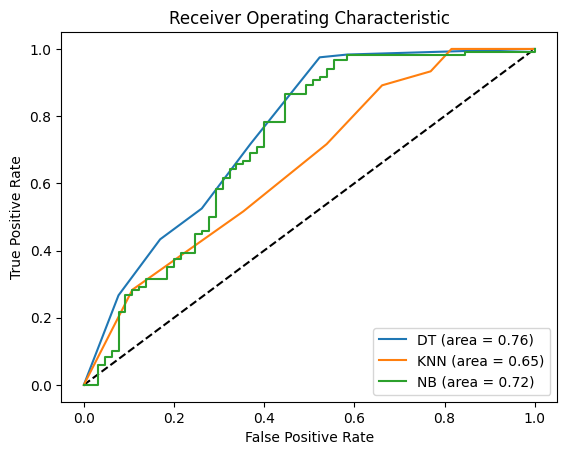

In [134]:
# make ROC Curve
plt.plot([0, 1], [0, 1], 'k--')

for name in ['DT', 'KNN', 'NB']:
    fpr, tpr, _ = roc_curve(y_test_2, probs[name])
    plt.plot(fpr, tpr, label='%s (area = %0.2f)' % (name, aucs[name]))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")